## *Import Libraries*

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [194]:
warnings.filterwarnings('ignore')

## *Load Data*

In [195]:
nissan = pd.read_csv('../data/nissan.csv')

In [196]:
nissan.isnull().sum() / nissan.shape[0]

price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.383796
cylinders       0.354633
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
drive           0.255798
type            0.230417
paint_color     0.272121
dtype: float64

### *Model Names*

In [197]:
nissan.model.unique()

array(['maxima', 'quest ', 'fronti', 'pathfi', 'xterra', 'altima',
       'murano', 'sentra', 'f-150', '350z t', 'titan ', 'quest', 'versa ',
       'armada', 'versa', 'rogue', 'rogue ', 'nv200 ', '4 door', 'centra',
       'pickup', 'exterr', 'fromti', 'mvp lx', '350z', '350 z', 'maximu',
       'titan', '350z c', '350z r', 'ud 150', 'maxim', 'ud', '350z -',
       '350z e', 'also', 'morano', 'marano', 'alitma', '350z g', 'ud 180',
       'armand', 'sltima', 'juke', 'juke s', '350z b', 'cube 1', 'cube s',
       'cube', 'rouge ', '370z t', '370z', 'gtr pr', '370z n', 'rouge',
       '370z r', 'z', '370z c', 'leaf', 'aerst', 'leaf s', 'feaf',
       'juke f', 'senta', 'nv car', 'nv', 'juke 5', 'nv 250', 'nv2500',
       'maxmia', 'ud2600', 'nv3500', 'gt-r', 'nv200', 'nv s 1', 'nv 350',
       'nv 150', 'nv1500', 'nvp', 'murran', 'juke -', 'juke n', 'juke c',
       'juke a', 'nv 200', 'roque', '370 z', 'nv pas', 'vn', 'note',
       'pro 4x', 'gtr', 'mauran', 'altma', 'lifted', 'seentr

It can be seen that the name of some models is misspelled, so it is necessary to write them correctly in addition to reducing the number of unique values.

Badly written car models are still appreciated.

In [198]:
nissan = nissan.query('model!="f-150"')

Delete this car model as it does not belong to Nissan.

In [199]:
sentra = ['centra','seentr','senta']
altima = ['alitma','atilma','sltima','atlima','altma']
maxima = ['maxmia','maxim','maximu','maxmia']

In [200]:
nissan.model = np.where(nissan.model=='versa ','versa',nissan.model)
nissan.model = nissan.apply(lambda x: 'sentra' if x.model in sentra else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'altima' if x.model in altima else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'maxima' if x.model in maxima else x.model,axis = 1)

In [201]:
murano = ['mauran','morano','marano','murran']
rogue = ['rougue','rogue ','roque','rouge','rogue','rouge ','rogue+']

In [202]:
nissan.model = np.where(nissan.model=='pathfi','pathfinder',nissan.model)
nissan.model = np.where(nissan.model=='exterr','x-trail',nissan.model)
nissan.model = nissan.apply(lambda x: 'murano' if x.model in murano else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'rogue' if x.model in rogue else x.model,axis = 1)

In [203]:
_350z = ['350z t','350z c','350z r','350z n','350z z','350z g','350 z','350z b','350z e','350z -','350z c']
_370z = ['370 z','370z c','370z n','370z r','370z t','370z s','370z w']
gtr = ['gt-r','gtr pr']

In [204]:
nissan.model = nissan.apply(lambda x: '350z' if x.model in _350z else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: '370z' if x.model in _370z else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'gtr' if x.model in gtr else x.model,axis = 1)

In [205]:
juke = ['juke -','juke n','juke c','juke a','juke f','juke 5','juke s']
cube = ['cube s','cube','cube 1']
leaf = ['leaft','feaf','leaf s']

In [206]:
nissan.model = nissan.apply(lambda x: 'leaf' if x.model in leaf else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'juke' if x.model in juke else x.model,axis = 1)
nissan.model = nissan.apply(lambda x: 'cube' if x.model in cube else x.model,axis = 1)

In [207]:
frontier = ['fronti','fromti']

In [208]:
nissan.model = nissan.apply(lambda x: 'frontier' if x.model in frontier else x.model,axis = 1)
nissan.model = np.where(nissan.model=='armand','armada',nissan.model)
nissan.model = np.where(nissan.model=='kicks ','kicks',nissan.model)
nissan.model = np.where(nissan.model=='titan ','titan',nissan.model)
nissan.model = np.where(nissan.model=='kicks ','kicks',nissan.model)
nissan.model = np.where(nissan.model=='pickup','frontier',nissan.model)

In [209]:
nissan = nissan.query('model!="2017 a"  and model!="camry" and model!="4 door" and model!="also"')
nissan = nissan.query('model!="aerst"')

In [210]:
nissan.model.unique()

array(['maxima', 'quest ', 'frontier', 'pathfinder', 'xterra', 'altima',
       'murano', 'sentra', '350z', 'titan', 'quest', 'versa', 'armada',
       'rogue', 'nv200 ', 'x-trail', 'mvp lx', 'ud 150', 'ud', 'ud 180',
       'juke', 'cube', '370z', 'gtr', 'z', 'leaf', 'nv car', 'nv',
       'nv 250', 'nv2500', 'ud2600', 'nv3500', 'nv200', 'nv s 1',
       'nv 350', 'nv 150', 'nv1500', 'nvp', 'nv 200', 'nv pas', 'vn',
       'note', 'pro 4x', 'lifted', 'kicks', 'cargo ', '200 nv'],
      dtype=object)

In [211]:
nissan['model'] = np.where(nissan['model']=='nv pass','nv passenger',nissan.model)
nissan['model'] = np.where(nissan['model']=='nv car','nv',nissan.model)
nissan.model = np.where(nissan.model=="feaf",'leaf',nissan.model)

In [212]:
nissan.model = np.where(nissan.model=="200 nv","nv200",nissan.model)
nissan.model = np.where(nissan.model=="nv200 ","nv200",nissan.model)
nissan.model = np.where(nissan.model=="quest ","quest",nissan.model)
nissan.model = np.where(nissan.model=="nv s 1","nv",nissan.model)
nissan.model = np.where(nissan.model=="armada","armand",nissan.model)
nissan.model = np.where(nissan.model=="nvp","nv",nissan.model)
nissan.model = np.where(nissan.model=="nv pas","nv",nissan.model)
nissan = nissan.query('model!="mvp lx"')

In [213]:
nissan.model = np.where(nissan.model=="nv 150","nv150",nissan.model)
nissan.model = np.where(nissan.model=="nv 200","nv200",nissan.model)
nissan.model = np.where(nissan.model=="nv 250","nv250",nissan.model)
nissan.model = np.where(nissan.model=="nv 350","nv350",nissan.model)
nissan.model = np.where(nissan.model=="cargo ","cargo",nissan.model)

### *Type Body Car*

In [214]:
coupe = ['350z','370z','z','gtr']
sedan =  ['versa','sentra','altima','maxima']
suv = ['murano','rogue','pathfinder','juke','kicks','extreme','armand','x-trail']

In [215]:
nissan.type = nissan.apply(lambda x: 'coupe' if x.model in coupe else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'sedan' if x.model in sedan else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'SUV' if x.model in suv else x.type,axis = 1)

In [216]:
mini_van =  ['cube','quest']
offroad = ['xterra','lifted']
pickup = ['frontier','titan','pro 4x']

In [217]:
nissan.type = nissan.apply(lambda x: 'coupe' if x.model in coupe else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'sedan' if x.model in sedan else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'SUV' if x.model in suv else x.type,axis = 1)

In [218]:
pickup = ['frontier','titan','pro 4x']
hatchback = ['note','leaf']

In [219]:
nissan.type = nissan.apply(lambda x: 'pickup' if x.model in pickup else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'hatchback' if x.model in hatchback else x.type,axis = 1)

In [220]:
van = ['nv','nv150','nv200','nv250','nv350','nv1500','nv2500','nv 3500','vn','cargo']
bus =  ['ud','ud 150','ud 180','ud 3500']
mini_van = ['cube','quest']

In [221]:
nissan.type = nissan.apply(lambda x: 'mini-van' if x.model in mini_van else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'van' if x.model in van else x.type,axis = 1)
nissan.type = nissan.apply(lambda x: 'bus' if x.model in bus else x.type,axis = 1)

### *Transmission*

In [222]:
nissan.transmission = np.where(nissan.transmission=="other",
                               "automatic",
                               nissan.transmission)

We will treat the "other" category as lost value since it does not provide useful information, we will replace it with an automatic transmission type because most of the cars in the United States have this type of gearbox.

## *Fuel*

In [223]:
nissan.fuel = np.where(nissan.fuel=="other",
                               "gas",
                               nissan.fuel)

We carry out a process similar to the previous one.

## *Cylinders*

In [224]:
nissan.cylinders = np.where(nissan.fuel=="electric",0,nissan.cylinders)

## *Color*

In [225]:
nissan_color_null = nissan[nissan.paint_color.isnull()]
nissan = nissan.dropna(subset=['paint_color'])

In [226]:
nissan.paint_color.value_counts()[:5]

black     1530
white     1453
silver    1365
grey      1055
blue       693
Name: paint_color, dtype: int64

In [227]:
nissan_color_null.shape[0]

2700

In [228]:
nissan_color_null['paint_color'] = np.random.choice(['black','white',
                                                     'silver','grey',
                                                     'blue'],
                                                     nissan_color_null.shape[0])

In this variable we replace the missing values by the 5 most common colors, for this we will use the np.random.choice() function, which will receive the list of colors as well as the dimension as a parameter.

In [229]:
nissan = pd.concat([nissan,nissan_color_null])

## *Type Body*

In [230]:
sedan = nissan.query('type == "sedan"') #
suv = nissan.query('type == "SUV"') #
coupe = nissan.query('type == "coupe"') #
pickup = nissan.query('type == "pickup"') #
offroad = nissan.query('type == "offroad"') #
hatchback = nissan.query('type == "hatchback"') #

We create several subsets where we divide the data based on the type of car body.

## *Sedan*

## *Tida*

In [231]:
tida = sedan.query('model=="versa" and year<=2011')
tida['model'] = "tida"

In Versa models with a manufacturing date prior to 2011, in some markets they call it Nissan Tida.

#### *Transmission*

In [232]:
tida.transmission.unique()

array(['automatic', 'manual'], dtype=object)

#### *Fuel*


In [233]:
tida.fuel.unique()

array(['gas'], dtype=object)

#### *Cylinders*

In [234]:
tida.cylinders = np.where(tida.cylinders!=4,4,tida.cylinders)

### *Year*

In [235]:
tida.year = np.where(tida.year<2006,2006,tida.year)

Nissan Versa models with a year of manufacture less than or equal to the year 2011 belong to Nissan Tida models

In [236]:
tida.fuel.unique()

array(['gas'], dtype=object)

#### *Engine Size*

In [237]:
tida['engine_size'] = 1.8

#### *Horsepower*

In [238]:
tida['hp'] = 124

## *Versa*

In [239]:
versa = sedan.query('model=="versa"')

#### *Transmission*

In [240]:
versa.transmission.unique()

array(['automatic', 'manual'], dtype=object)

#### *Cylinders*

In [241]:
versa.cylinders.unique()

array([ 4., nan,  3.,  6.,  0.])

In [242]:
versa.cylinders = np.where(versa.cylinders!=4,4,versa.cylinders)

In [243]:
versa.cylinders.unique()

array([4.])

#### *Fuel*

In [244]:
versa.fuel.unique()

array(['gas', 'diesel', 'electric'], dtype=object)

In [245]:
versa.fuel = np.where(versa.fuel!="gas","gas",versa.fuel)

In [246]:
versa.fuel.unique()

array(['gas'], dtype=object)

### *Year*

In [247]:
versa = versa.query('year>2011')

#### *Engine Size*

In [248]:
versa['engine_size'] = 1.6

#### *Horsepower*

In [249]:
filters = [
    (versa.year<=2017),
    (versa.year>2017) & (versa.year<=2019),
    (versa.year>2019)
]

hp= [107,109,122]
versa['hp'] = np.select(filters,hp)

In [250]:
max_price = versa.price.max()
versa = versa.query('price<@max_price')

### *Sentra*

In [251]:
sentra = sedan.query('model=="sentra"')

### *Fuel*

In [252]:
sentra.fuel.unique()

array(['gas', 'diesel'], dtype=object)

In [253]:
sentra.fuel = np.where(sentra.fuel!="gas","gas",sentra.fuel)

In [254]:
sentra.fuel.unique()

array(['gas'], dtype=object)

#### *Transmission*

In [255]:
sentra.transmission.unique()

array(['automatic', 'manual'], dtype=object)

#### *Cylinders*

In [256]:
sentra.cylinders.unique()

array([ 4., nan,  6.])

In [257]:
sentra.cylinders = np.where(sentra.cylinders!=4,4,sentra.cylinders)

In [258]:
sentra.cylinders.unique()

array([4.])

#### *Engine Size*

In [259]:
filters = [
    (sentra.year<=2006),
    (sentra.year>2006) & (sentra.year<=2012),
    (sentra.year>2012) & (sentra.year<=2019),
    (sentra.year>=2020)
]

engine = [1.8,2.0,1.8,2.0]
sentra['engine_size'] = np.select(filters,engine)

#### *Horsepower*

In [260]:
filters = [
  (sentra.year<=2006),
    (sentra.year>=2007) & (sentra.year<=2012),
    (sentra.year>=2013) & (sentra.year<=2019),
    (sentra.year>=2020)
]
hp = [129,140,130,145]
sentra['hp'] = np.select(filters,hp)

### *Altima*

In [261]:
altima = sedan.query('model=="altima"')

#### *Fuel*

In [262]:
altima.fuel.unique()

array(['gas', 'electric', 'hybrid'], dtype=object)

#### *Cylinders*

In [263]:
condition = (altima.year>=2019) & (altima.cylinders==6)
altima.cylinders = np.where(condition,4,altima.cylinders)

Starting in 2019, Nissan changed the iconic V6 engine for its most advanced version, now instead of having 6 cylinders it will have 4.

In [264]:
altima.cylinders.fillna(6,inplace = True)

In [265]:
filters = [
    (altima.fuel=="electric"),
    (altima.cylinders>=1) & (altima.cylinders<=4),
    (altima.cylinders>=5)
]

cyl = [0,4,6]
altima.cylinders = np.select(filters,cyl)

In [266]:
altima.cylinders.unique()

array([6, 4, 0])

We corrected the number of cylinders.

#### *EngineSize*

In [267]:
filters = [
    (altima.year<=2001),
(altima.year>2001) & (altima.year<=2012) & (altima.cylinders==4),
(altima.year>2001) & (altima.year<=2012) & (altima.cylinders==6),
(altima.year>2012) & (altima.year<=2018) & (altima.cylinders==4),
(altima.year>2012) & (altima.year<=2018) & (altima.cylinders==6),
(altima.fuel=="electric")
]
engine= [2.4,2.5,3.5,2.5,3.5,0]
altima['engine_size'] = np.select(filters,engine)

In [268]:
outlier = altima.query('engine_size==0')
clear = altima.query('engine_size!=0')

In [269]:
outlier['engine_size'] = np.where(outlier.price>=23000,2.0,2.5)

In [270]:
altima = pd.concat([outlier,clear])

In [271]:
altima.engine_size = np.where(altima.fuel=="electric",0,altima.engine_size)

#### *Horsepower*

In [272]:
filters = [
 (altima.engine_size==2.4),
((altima.year>2001)) & ((altima.year<=2006)) & ((altima.cylinders==4)),
((altima.year>2001)) & ((altima.year<=2006)) & ((altima.cylinders==6)),
((altima.year>=2007)) & ((altima.year<=2012)) & ((altima.cylinders==4)),
((altima.year>=2007)) & ((altima.year<=2012)) & ((altima.cylinders==6)),
((altima.year>=2013)) & ((altima.year<=2018)) & ((altima.cylinders==4)),
((altima.year>=2013)) & ((altima.year<=2018)) & ((altima.cylinders==6)),
((altima.year>=2019)) & ((altima.engine_size==2.5)),
((altima.year>=2019)) & ((altima.engine_size==2.0))
]

hp = [155,175,248,177,270,181,270,181,248]
altima['hp'] = np.select(filters,hp)

### *Maxima*

In [273]:
maxima = sedan.query('model=="maxima"')

#### *Fuel*

In [274]:
maxima.fuel = np.where(maxima.fuel!="gas","gas",maxima.fuel)

#### *Cylinders*

In [275]:
maxima.cylinders = np.where(maxima.cylinders!=6,6,maxima.cylinders)

#### *Engine Size*

In [276]:
maxima['engine_size'] = np.where(maxima.year<=2001,3.0,3.5)

#### *Horsepower*

In [277]:
filters = [
    (maxima.year<=2003),
    (maxima.year>=2004) & (maxima.year<=2008),
    (maxima.year>=2009) & (maxima.year<=2015),
    (maxima.year>=2016)
   
]
hp = [222,255,290,300]
maxima['hp'] = np.select(filters,hp)

In [278]:
sedan = pd.concat([tida,versa,sentra,altima,maxima])

## *SUV*

In [279]:
suv.model.unique()

array(['pathfinder', 'xterra', 'murano', 'armand', 'rogue', 'x-trail',
       'juke', 'kicks'], dtype=object)

### *Pathfinder*

In [280]:
pathfinder = suv.query('model=="pathfinder"')

#### *Cylinders*

In [281]:
pathfinder.cylinders.fillna(6,inplace = True)

pathfinder.cylinders = np.where(pathfinder.fuel=="hybrid",
                                4,
                                pathfinder.cylinders)

pathfinder = pathfinder.query('cylinders==6 or cylinders==8')

#### *Engine Size*

In [282]:
filters = [
    
    (pathfinder.year>=2000) & (pathfinder.year<=2004),
    (pathfinder.cylinders==4),
    (pathfinder.cylinders==8),
    (pathfinder.year>=2005) & (pathfinder.year<=2012),
    (pathfinder.year>=2013)

]

engine = [3.5,2.5,5.6,4.0,3.5]

pathfinder['engine_size'] = np.select(filters,engine)

#### *Horsepower*

In [283]:
filters = [
    
    (pathfinder.year>=2000) & (pathfinder.year<=2004),
    (pathfinder.engine_size==2.5),
    (pathfinder.engine_size==5.6),
    (pathfinder.engine_size==4.0),
    (pathfinder.year>=2013) & (pathfinder.year<=2016),
    (pathfinder.year>=2017)
    
]

hp = [240,260,310,288,260,284]
pathfinder['hp'] = np.select(filters,hp)

### *Murano*

In [284]:
murano = suv.query('model=="murano"')

#### *Cylinders*

In [285]:
murano.cylinders.fillna(6,inplace = True)
murano.cylinders = np.where(murano.cylinders==8,
                            6,
                            murano.cylinders)

In [286]:
hybird = murano.query('fuel=="hybrid" and cylinders!=6')
gas = murano.query('fuel!="hybrid"')

#### *Engine Size*

In [287]:
hybird['engine_size'] = 2.5
gas['engine_size'] = 3.5

#### *Horsepower*

In [288]:
hybird['hp'] = 246

In [289]:
murano.year.agg({'min','max'})

min    2003.0
max    2020.0
Name: year, dtype: float64

In [290]:
filters = [
    
    (gas.year<=2006),
    (gas.year==2007),
    (gas.year==2008),
    (gas.year>=2008) & (gas.year<=2011),
    (gas.year>=2012) & (gas.year<=2018),
    (gas.year==2019),
    (gas.year==2020)
    
]

hp = [245,240,256,265,260,252,260]
gas['hp'] = np.select(filters,hp)

In [291]:
murano = pd.concat([gas,hybird])

In [292]:
suv.model.unique()

array(['pathfinder', 'xterra', 'murano', 'armand', 'rogue', 'x-trail',
       'juke', 'kicks'], dtype=object)

### *Armand*

In [293]:
armand = suv.query('model=="armand"')

#### *Cylinders*

In [294]:
armand.cylinders.fillna(8,inplace = True)
armand.cylinders = np.where(armand.cylinders!=8,8,armand.cylinders)

#### *Engine Size*

In [295]:
armand['engine_size'] = 5.6

#### *Horsepower*

In [296]:
filters = [
    (armand.year<=2006),
    (armand.year>=2007) & (armand.year<=2015),
    (armand.year>=2016)
]

hp = [306,317,390]
armand['hp'] = np.select(filters,hp)

### *Rogue*

In [297]:
rogue = suv.query('model=="rogue"')

#### *Year*

In [298]:
rogue.year = np.where(rogue.year<2007,2007,rogue.year)

#### *Cylinders*

In [299]:
rogue.cylinders.fillna(4,inplace = True)
rogue.cylinders = np.where(rogue.cylinders!=4,4,rogue.cylinders)

#### *Engine Size*

In [300]:
rogue['engine_size'] = 2.5

#### *Horsepower*

In [301]:
rogue['hp'] = 170

### *Extreme*

In [302]:
extreme = suv.query('model=="extreme"')

#### *Cylinders*

In [303]:
extreme.cylinders.fillna(4,inplace = True)

#### *Engine Size*

In [304]:
extreme['engine_size'] = 2.5

#### *Horsepower*

In [305]:
extreme['hp'] = 170

## *Juke*

In [306]:
juke = nissan.query('model=="juke"')

#### *Year*

In [307]:
juke.year = np.where(juke.year<=2010,2010,juke.year)

#### *Fuel*

In [308]:
juke.fuel = np.where(juke.fuel=="other","gas",juke.fuel)

#### *Cylinders*

In [309]:
juke.cylinders.fillna(4,inplace = True)
juke.cylinders = np.where(juke.cylinders!=4,4,juke.cylinders)

#### *Engine Size*

In [310]:
juke['engine_size'] = 1.6

#### *Horsepower*

In [311]:
filters = [
    (juke.year<=2010),
    (juke.year>=2011)
]

hp = [115,188]
juke['hp'] = np.select(filters,hp)

## *Kicks*

In [312]:
kicks = suv.query('model=="kicks"')

#### *Cylinders*

In [313]:
kicks.cylinders.fillna(4,inplace = True)

#### *Engine Size*

In [314]:
kicks['engine_size'] = 2.5

#### *Horsepower*

In [315]:
filters = [
    (kicks.year<=2019),
    (kicks.year>=2020)
]
hp = [125,122]
kicks['hp'] = np.select(filters,hp)

In [316]:
suv = pd.concat([pathfinder,murano,armand,rogue,extreme,juke,kicks])

## *Pickup*

### *Titan*

In [317]:
titan = pickup.query('model=="titan"')

#### *Fuel*

In [318]:
titan = titan.query('fuel!="electric"')

#### *Cylinders*

In [319]:
titan.cylinders.fillna(8,inplace = True)
titan = titan.query('cylinders==8')

#### *Engine Size*

In [320]:
filters = [
    (titan.fuel=="gas"),
    (titan.fuel=="diesel")
]

engine = [5.6,5.0]
titan['engine_size'] = np.select(filters,engine)

#### *Horsepower*

In [321]:
filters = [
    (titan.year>=2004) & (titan.year<=2006),
    (titan.year>=2007) & (titan.year<=2015),
    (titan.year>=2016) & (titan.year<=2019) & (titan.fuel=="gas"),
    (titan.year>=2016) & (titan.year<=2019) & (titan.fuel=="diesel"),
    (titan.year>=2020),
]
hp = [305,317,390,310,400]
titan['hp'] = np.select(filters,hp)

### *Frontier*

In [322]:
frontier = pickup.query('model=="frontier" or model=="pro 4x"')
frontier.model = np.where(frontier.model!="frontier","frontier",frontier.model)

#### *Cylinders*

In [323]:
frontier.cylinders.fillna(6,inplace = True)
frontier = frontier.query('cylinders!=8')

#### *Engine Size*

In [324]:
frontier.year.agg({'min','max'})

min    2000.0
max    2020.0
Name: year, dtype: float64

In [325]:
filters = [
    
    (frontier.year>=2000) & (frontier.year<=2004) & (frontier.cylinders==4),
    (frontier.year>=2000) & (frontier.year<=2004) & (frontier.cylinders==6),
    
    (frontier.year>=2005) & (frontier.year<=2015) & (frontier.cylinders==4),
    (frontier.year>=2005) & (frontier.year<=2015) & (frontier.cylinders==6),
    
   (frontier.year>=2016) & (frontier.cylinders==4),
    (frontier.year>=2016) & (frontier.year<=2019) & (frontier.cylinders==6),
    (frontier.year>=2019)
    
]

engine = [2.4,3.3,2.4,4.0,2.5,4.0,3.8]

frontier['engine_size'] = np.select(filters,engine)

#### *Horsepower*

In [326]:
filters = [
     (frontier.year>=2000) & (frontier.year<=2004) & (frontier.cylinders==4),
    (frontier.year>=2000) & (frontier.year<=2002) & (frontier.cylinders==6),
    (frontier.year>=2003) & (frontier.year<=2004) & (frontier.cylinders==6),
    
    (frontier.year>=2005) & (frontier.year<=2015) & (frontier.cylinders==4),
    (frontier.year>=2005) & (frontier.year<=2015) & (frontier.cylinders==6),
    
    (frontier.year>=2016) & (frontier.year<=2017) & (frontier.cylinders==4),
    (frontier.year>=2017) & (frontier.year<=2019) & (frontier.cylinders==4),
    (frontier.year>=2020) & (frontier.cylinders==4),
    
    
    (frontier.year>=2016) & (frontier.year<=2019) & (frontier.cylinders==6),
    (frontier.year>=2020) & (frontier.cylinders==6)
    
]

hp = [143,170,210,154,265,158,161,166,261,310]
frontier['hp'] = np.select(filters,hp)

In [327]:
pickup = pd.concat([frontier,titan])

## *Coupe*

In [328]:
coupe.model.unique()

array(['350z', '370z', 'gtr', 'z'], dtype=object)

In [329]:
coupe.query('model=="z"')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
3097,9539.0,2010.0,nissan,z,excellent,6.0,gas,79864.0,clean,automatic,rwd,coupe,grey
3098,9579.0,2010.0,nissan,z,excellent,6.0,gas,79864.0,rebuilt,automatic,rwd,coupe,grey
8028,29995.0,2017.0,nissan,z,good,6.0,gas,16835.0,clean,automatic,rwd,coupe,blue


In [330]:
condition = (coupe.model=="z") & (coupe.title_status!="rebuilt")
coupe['model'] = np.where(condition,'370z',coupe.model)

#### *Cylinders*

In [331]:
coupe.cylinders.unique()

array([ 6., nan])

In [332]:
coupe.cylinders.fillna(6,inplace = True)

#### *Fuel*

In [333]:
coupe.fuel.unique()

array(['gas'], dtype=object)

## *350z*

In [334]:
_350z = coupe.query('model=="350z"')

#### *Engine*

In [335]:
_350z['engine_size'] = 3.5

#### *Horsepower*

In [336]:
filters = [
    (_350z.year<=2005),
    (_350z.year==2006),
    (_350z.year>=2007)
]

hp = [287,300,306]

_350z['hp'] = np.select(filters,hp)

## *370z*

In [337]:
_370z = coupe.query('model=="370z"')

#### *Engine Size*

In [338]:
_370z['engine_size'] = 3.7

#### *Horsepower*

In [339]:
_370z['hp'] = 332

## *GTR*

In [340]:
gtr = coupe.query('model=="gtr"')

#### *Engine Size*

In [341]:
gtr['engine_size'] = 3.8

#### *Horsepower*

In [342]:
filters = [
    (gtr.year<=2007),
    (gtr.year>=2008) & (gtr.year<=2011),
    (gtr.year==2012),
    (gtr.year>2012)
]

hp = [480,485,530,545]

gtr['hp'] = np.select(filters,hp)

In [343]:
coupe = pd.concat([_350z,_370z,gtr])

## *Hatchback*

In [344]:
hatchback.cylinders = np.where(hatchback.fuel=="electric",
                               0,
                               hatchback.cylinders)

### *Leaft*

In [345]:
leaft = hatchback.query('model=="leaf"')

In [346]:
leaft = leaft.query('fuel=="electric"')

This car is Nissan's response to add to the trend of fully electric cars

In [347]:
leaft.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [348]:
leaft.transmission = np.where(leaft.transmission!="automatic",
                              "automatic",
                              leaft.transmission)

All electric cars share a single-speed automatic transmission.

#### *Engine Size*

In [349]:
leaft['engine_size'] = 0

Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimeters (cc). Because it is an electric car we will assign an engine size with a value of zero.

#### *Horsepower*

In [350]:
leaft['hp'] = 147

## *Note*

In [351]:
note = hatchback.query('model=="note"')

#### *Cylinders*

In [352]:
note.cylinders.fillna(4,inplace = True)

#### *Engine Size*

In [353]:
note['engine_size'] = 1.6

#### *Horsepower*

In [354]:
note['hp'] = 109

In [355]:
hatchback = pd.concat([leaft,note])

## *Offroad*

### *Xterra*

In [356]:
xterra = offroad.query('model=="xterra"')

#### *Fuel*

In [357]:
xterra.fuel = np.where(xterra.fuel!="gas","gas",xterra.fuel)

#### *Cylinders*

In [358]:
xterra.cylinders.fillna(6,inplace=True)
xterra.cylinders = np.where(xterra.cylinders>6,6,xterra.cylinders)

#### *Engine Size*

In [359]:
filters = [
    (xterra.year<=2004) & (xterra.cylinders==4),
    (xterra.year<=2004) & (xterra.cylinders==6),
    (xterra.year>=2005)
]

engine = [2.4,3.3,4.0]

xterra['engine_size'] = np.select(filters,engine)

#### *Horsepower*

In [360]:
filters = [
    (xterra.engine_size==2.4),
    (xterra.engine_size==3.3),
    (xterra.engine_size==4.0)
]

hp = [143,170,265]

xterra['hp'] = np.select(filters,hp)

In [361]:
offroad = pd.concat([xterra])

## *Final Clear*

In [362]:
nissan = pd.concat([sedan,pickup,suv,offroad,coupe,hatchback])

In [363]:
nissan.year = nissan.year.astype(np.int32)

### *Condition*

In [364]:
nissan_condition_null = nissan[nissan.condition.isnull()]
nissan = nissan.dropna(subset=['condition'])

In [365]:
filters = [
    
    (nissan_condition_null.year==2000) & (nissan_condition_null.odometer<=196980),
    (nissan_condition_null.year==2001) & (nissan_condition_null.odometer<=187600),
    (nissan_condition_null.year==2002) & (nissan_condition_null.odometer<=178220),
    (nissan_condition_null.year==2003) & (nissan_condition_null.odometer<=168840),
    (nissan_condition_null.year==2004) & (nissan_condition_null.odometer<=159460),
    
    (nissan_condition_null.year==2005) & (nissan_condition_null.odometer<=150080),
    (nissan_condition_null.year==2006) & (nissan_condition_null.odometer<=140700),
    (nissan_condition_null.year==2008) & (nissan_condition_null.odometer<=121940),
    (nissan_condition_null.year==2009) & (nissan_condition_null.odometer<=112560),
    (nissan_condition_null.year==2010) & (nissan_condition_null.odometer<=103180),
    
    (nissan_condition_null.year==2011) & (nissan_condition_null.odometer<=93800),
    (nissan_condition_null.year==2012) & (nissan_condition_null.odometer<=84420),
    (nissan_condition_null.year==2013) & (nissan_condition_null.odometer<=75040),
    (nissan_condition_null.year==2014) & (nissan_condition_null.odometer<=65660),
    (nissan_condition_null.year==2015) & (nissan_condition_null.odometer<=56280),
    
    (nissan_condition_null.year==2016) & (nissan_condition_null.odometer<=46900),
    (nissan_condition_null.year==2017) & (nissan_condition_null.odometer<=37520),
    (nissan_condition_null.year==2018) & (nissan_condition_null.odometer<=28140),
    (nissan_condition_null.year==2019) & (nissan_condition_null.odometer<=18760),
    (nissan_condition_null.year==2020) & (nissan_condition_null.odometer<=9380),
    (nissan_condition_null.year==2021) & (nissan_condition_null.odometer<=9380)
    
]

In [366]:
good = np.random.choice(['good'],10)
excellent = np.random.choice(['excellent'],8)
like_new = np.random.choice(['like new'],3)

condition = np.concatenate([good,excellent,like_new])

In [367]:
nissan_condition_null.condition = np.select(filters,condition)

In [368]:
nissan_condition_clear = nissan_condition_null.query('condition!="0"')
nissan_condition_null =  nissan_condition_null.query('condition=="0"')

In [369]:
filters = [
    (nissan_condition_null.year<=2010),
    (nissan_condition_null.year>=2011) & (nissan_condition_null.year<=2018),
    (nissan_condition_null.year>=2019)

]
condition = ['acceptable','good','excellent']
nissan_condition_null['condition'] = np.select(filters,condition)

In [370]:
nissan_condition_clear = pd.concat([nissan_condition_clear,nissan_condition_null])

In [371]:
nissan = pd.concat([nissan_condition_clear,nissan])

In [372]:
nissan =  nissan.drop(columns=['drive','manufacturer','model'])

## *Treatment of Variables*

### *Continuous Variables*

In [373]:
plt.style.use('ggplot')

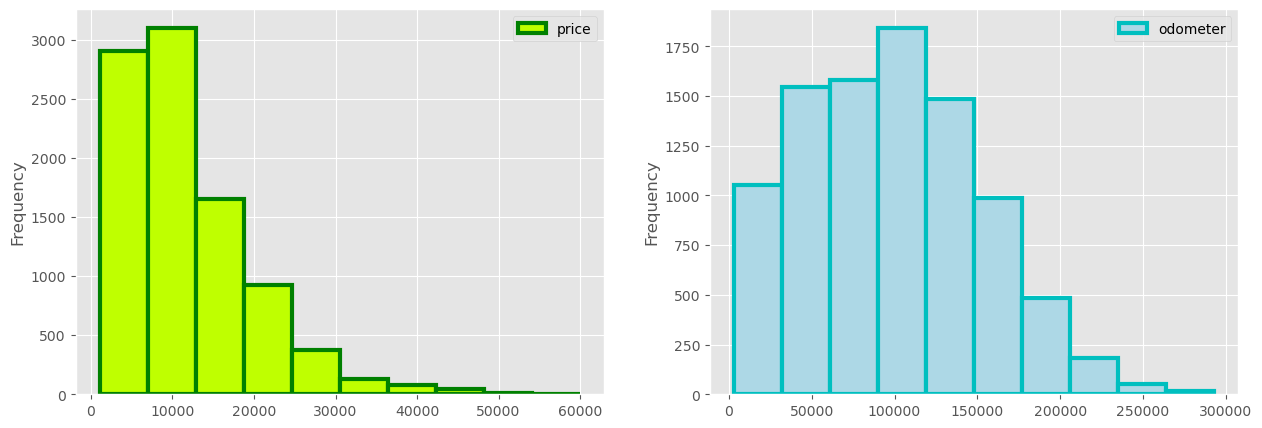

In [374]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
nissan.plot(kind = "hist",y = 'price',ax = ax[0],color = "#bfff00",ec = "green",lw = 3)
nissan.plot(kind = "hist",y = 'odometer',ax = ax[1],color = "lightblue",ec = "c",lw = 3)
plt.savefig('odmoter_price.png')

We observe several lagging data but at the same time they are consistent, since there are cars such as the case of the Nissan GTR that can cost too much. Here the solution will be to perform a transformation to the variable, so that the data has a value closer to the average value.

In [375]:
nissan.odometer = nissan.odometer.apply(np.sqrt)
nissan.price = nissan.price.apply(np.log)

We apply a logarithmic transformation for the price variable and for the mileage variable we extract the square root for each data, these transformations help to improve the distribution of the data allowing very distant values to be very close to the average value.

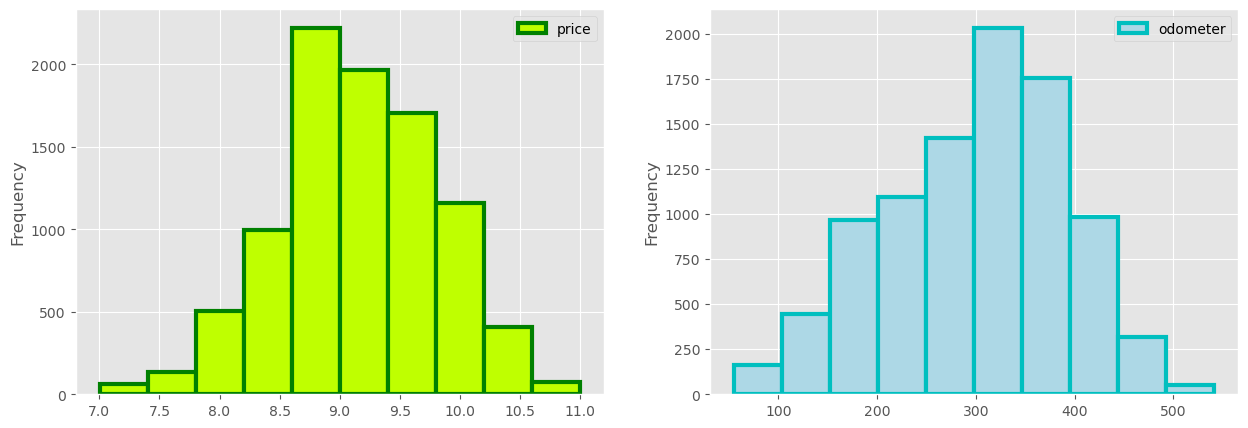

In [376]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
nissan.plot(kind = "hist",y = 'price',ax = ax[0],color = "#bfff00",ec = "green",lw = 3)
nissan.plot(kind = "hist",y = 'odometer',ax = ax[1],color = "lightblue",ec = "c",lw = 3)
plt.savefig('transform.png')

## *Categorical Variables*

### *Ordinal Variables*

In [377]:
nissan.condition.replace(['acceptable','good','excellent','like new'],[0,1,2,3],inplace = True)
nissan.title_status.replace(['parts only','lien','rebuilt','clean'],[0,1,2,3],inplace = True)

These variables are nominal categoricals because the order of the category matters.

### *Nominal Variables*

In [378]:
nissan.transmission = np.where(nissan.transmission=="automatic",1,0)
nissan = pd.get_dummies(nissan,prefix= " ",prefix_sep= " ")

The nominal variables do not specify any type of order, so the One Hot transformation will be applied here, where dummy variables will be created according to the number of categories.

## *Save Data Clear*

In [379]:
nissan.to_csv('../data/nissan_clear.csv',index = False)